In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

Parámetros cosmológicos

In [26]:
neff0=3.04 # número efectivo de especies relativista
h=.6736 #H0/100 km/s/Mpc
om_bar0=0.051 #parámetro de densidad bariónico a z=0
om_dm0=0.264 #parámetro de densidad de materia oscura a z=0
om_lam0=0.68 #parámetro de densidad de constante cosmológica a z=0
om_rad0=9.237e-05 #parámetro de densidad de radiación a z=0

print(om_bar0+om_dm0)
c=299792 #km/s #velocidad de la luz
kmtoMpc=3.2408e-20 #factor de conversión de km a Mpc
H0s=(h*100)*kmtoMpc
c_over_H0=c*kmtoMpc/H0s #c/H0
c_over_H0

0.315


4450.593824228029

Definimos la ecuación de Friedmann para un Universo plano con materia oscura, materia bariónica, radiación y constante cosmológica

\begin{equation}
H^2=\frac{8 \pi G}{3}\left(\rho_{DM} + \rho_{b} + \rho_{r} + \rho_{\Lambda} \right),
\label{eq:FC}
\end{equation}


\begin{eqnarray}
{\dot\rho_{DM}}& + &3\,H \rho_{DM}=0,\\
{\dot\rho_{b}}& + &3\,H \rho_{b}=0,\\
{\dot\rho_{r}}& + &4\,H \rho_{r}=0,\\
{\dot\rho_{\Lambda}}&=&0.
\end{eqnarray}

Si no consideramos neutrinos, la Ec. de Friedmann en término de los parámetros de densidad y redshift

\begin{equation}
H^2=H_{0}^{2}\left[\Omega_{DM0}(1+z)^3 + \Omega_{b0}(1+z)^3 + \Omega_{r0}(1+z)^4+ \Omega_{\Lambda} \right]
\end{equation}

Podemos usar la condición de planitud para $\Omega_{\Lambda}=1-\Omega_{DM0}-\Omega_{b0}-\Omega_{r0}$

In [3]:
def Hz(z,h,om_bar0,om_dm0,om_rad0):
    H0=100*h
    z1=1.0+z
    z13=np.power(z1,3.)
    z14=np.power(z1,4.)
    OMAT=(om_bar0+om_dm0)*z13
    ORAD=om_rad0*z14
    x=np.sqrt(OMAT +ORAD +(1.0-om_dm0-om_rad0-om_bar0))
    return x*H0

def Ez(z,h,om_bar0,om_dm0,om_rad0):
    z1=1.0+z
    z13=np.power(z1,3.)
    z14=np.power(z1,4.)
    OMAT=(om_bar0+om_dm0)*z13
    ORAD=om_rad0*z14
    x=np.sqrt(OMAT +ORAD +(1.0-om_dm0-om_rad0-om_bar0))
    return x

In [4]:
Hz0=Ez(0,h,om_bar0,om_dm0,om_rad0)

In [5]:
print(Hz0)

1.0


In [6]:
bins=50
zbin=np.linspace(0,2,bins)
#print(zbin)

In [7]:
Hzbin=np.zeros(bins)

In [8]:
for i in range(len(zbin)):
    Hzbin[i]=Hz(zbin[i],h,om_bar0,om_dm0,om_rad0)

In [9]:
#print(Hzbin)

GRaficamos H(z) vs z

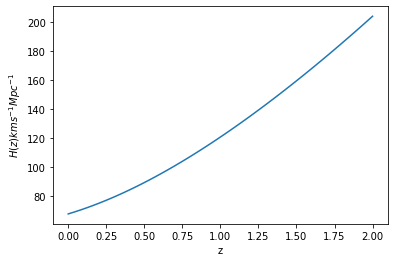

In [10]:
fig1=plt.figure()
plt.plot(zbin,Hzbin)
plt.xlabel('z')
plt.ylabel('$H(z) km s^{-1} Mpc^{-1}$')
plt.show()
fig1.savefig("Hz.pdf")

Tarea, calcular la edad del Universo. Sugerencia usar la función quad

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

Distancia comóvil
\begin{equation}
D_{C}(z)=D_{H}\int^{0}_{z}\frac{dz^{\prime}}{E(z^{\prime})}
\end{equation}

In [11]:
def f(z,h,om_bar0,om_dm0,om_rad0):
    return 1.0/Ez(z,h,om_bar0,om_dm0,om_rad0)

#Definición de distancia comóvil

def Dc(z,h,om_bar0,om_dm0,om_rad0):
    return c_over_H0*quad(lambda x:f(x,h,om_bar0,om_dm0,om_rad0),0,z)[0]


In [12]:
Dcbin=np.zeros(bins)
for i in range(len(zbin)):
    Dcbin[i]=Dc(zbin[i],h,om_bar0,om_dm0,om_rad0)

Graficamos la distancia comóvil como función de z

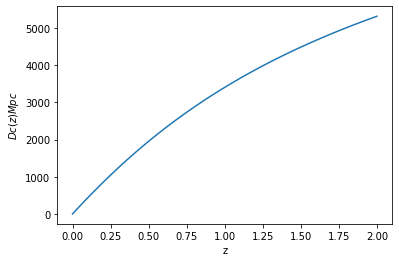

In [13]:
fig1=plt.figure()
plt.plot(zbin,Dcbin)
plt.xlabel('z')
plt.ylabel('$Dc(z) Mpc$')
plt.show()
fig1.savefig("DC.pdf")

Tarea: 

1)Definir funciones para calcular la distancia de diámetro angular y disntancia de luminosidad como función de z
2)Evaluar dichar funciones para un vector de z de 0 a 2
3)Graficar DA vs z y DL vs z

\begin{equation}
D_{A}(z)=\frac{D_{H}}{1+z}\int^{0}_{z}\frac{dz^{\prime}}{E(z^{\prime})}
\end{equation}

\begin{equation}
D_{A}(z_1,z_2)=\frac{D_{H}}{1+z_2}\int^{z2}_{z1}\frac{dz}{E(z)}
\end{equation}

In [14]:
def DA(z,h,om_bar0,om_dm0,om_rad0):
    return (1/(1+z))*Dc(z,h,om_bar0,om_dm0,om_rad0)

def DA12(z1,z2,h,om_bar0,om_dm0,om_rad0):
    return (c_over_H0/(1+z2))*quad(lambda x:f(x,h,om_bar0,om_dm0,om_rad0),z1,z2)[0]

In [15]:
DAbin=np.zeros(bins)
for i in range(len(zbin)):
    DAbin[i]=DA(zbin[i],h,om_bar0,om_dm0,om_rad0)

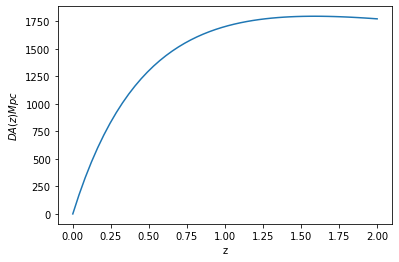

In [21]:
fig2=plt.figure()
plt.plot(zbin,DAbin)
plt.xlabel('z')
plt.ylabel('$DA(z) Mpc$')
plt.show()
fig2.savefig("DA.pdf")

In [22]:
def DL(z,h,om_bar0,om_dm0,om_rad0):
    return (1+z)*Dc(z,h,om_bar0,om_dm0,om_rad0)


In [18]:
DLbin=np.zeros(bins)
for i in range(len(zbin)):
    DLbin[i]=DL(zbin[i],h,om_bar0,om_dm0,om_rad0)

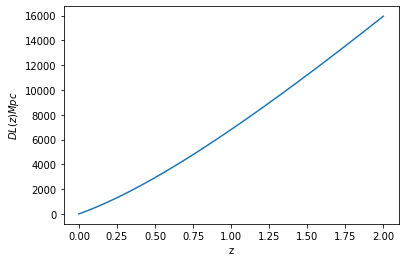

In [23]:
fig3=plt.figure()
plt.plot(zbin,DLbin)
plt.xlabel('z')
plt.ylabel('$DL(z) Mpc$')
plt.show()
fig3.savefig("DL.pdf")

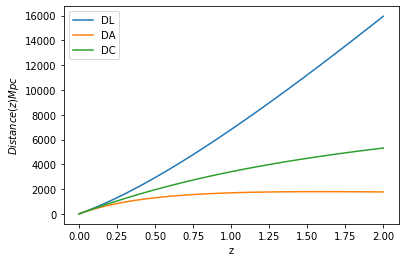

In [24]:
fig4=plt.figure()
plt.plot(zbin,DLbin, label='DL')
plt.plot(zbin,DAbin, label='DA')
plt.plot(zbin,Dcbin, label='DC')
plt.xlabel('z')
plt.ylabel('$Distance(z) Mpc$')
plt.legend()
fig4.savefig("Distances.pdf")